# MODULE 6
# Clustering For Diversification Analysis

In [230]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 6.1 Making a dataframe with closing price of 30 stocks

In [231]:
# setting the path of datasets into a single list
path = ['Large_Cap/ASIANPAINT.csv','Large_Cap/AXISBANK.csv','Large_Cap/ADANIPORTS.csv','Large_Cap/GAIL.csv','Large_Cap/HEROMOTOCO.csv',
        'Large_Cap/RELIANCE.csv','Large_Cap/TCS.csv','Large_Cap/INFY.csv','Large_Cap/MARUTI.csv','Large_Cap/TITAN.csv',
        'Mid_Cap/TATAPOWER.csv','Mid_Cap/VOLTAS.csv','Mid_Cap/SUNTV.csv','Mid_Cap/NBCC.csv','Mid_Cap/MINDTREE.csv',
        'Mid_Cap/APOLLOTYRE.csv','Mid_Cap/PNB.csv','Mid_Cap/MRPL.csv','Mid_Cap/IGL.csv','Mid_Cap/IDBI.csv',
        'Small_Cap/ASHOKA.csv','Small_Cap/BAJAJELEC.csv','Small_Cap/CENTURYPLY.csv','Small_Cap/FORTIS.csv',
        'Small_Cap/JETAIRWAYS.csv','Small_Cap/PVR.csv','Small_Cap/VENKEYS.csv','Small_Cap/RAYMOND.csv',
        'Small_Cap/VIPIND.csv','Small_Cap/RCOM.csv',]

In [232]:
# defining function to pull out the closing price from stock dataset and checking shape of each dataframe
def close(comp):
    df_close = pd.read_csv(comp)
    df_close = df_close[df_close['Series']=='EQ']
    print(df_close.shape)
    return df_close['Close Price']

# defining function to create dataframe with stock closing price on each column
def creator(path):
    
    df = pd.DataFrame()
    for comp in (path):
        df[comp.split('/')[1].split('.')[0]] = close(comp)
    return df
    
        


In [233]:
# executing the defined function
df=creator(path)

(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)


In [234]:
# chceking the  number of null row on each columns
df.isna().sum()

ASIANPAINT    0
AXISBANK      1
ADANIPORTS    0
GAIL          1
HEROMOTOCO    1
RELIANCE      1
TCS           4
INFY          1
MARUTI        1
TITAN         2
TATAPOWER     1
VOLTAS        1
SUNTV         1
NBCC          1
MINDTREE      1
APOLLOTYRE    1
PNB           1
MRPL          1
IGL           3
IDBI          1
ASHOKA        1
BAJAJELEC     1
CENTURYPLY    1
FORTIS        1
JETAIRWAYS    1
PVR           1
VENKEYS       1
RAYMOND       1
VIPIND        1
RCOM          1
dtype: int64

In [235]:
 # for setting dates as the index for the new dataframe
df1 = pd.read_csv('INFY.csv')
df1 = df1[df1['Series']=='EQ']
df.index = df1['Date']


In [236]:
# conveting the index from obj to datetime format and droping the null values
df.index = pd.to_datetime(df.index)
df= df.dropna()

df

,ASIANPAINT,AXISBANK,ADANIPORTS,GAIL,HEROMOTOCO,RELIANCE,TCS,INFY,MARUTI,TITAN,...,ASHOKA,BAJAJELEC,CENTURYPLY,FORTIS,JETAIRWAYS,PVR,VENKEYS,RAYMOND,VIPIND,RCOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,1148.05,500.10,356.20,414.00,3515.45,1344.10,2365.10,951.55,6823.90,483.65,...,216.05,341.15,266.65,205.25,527.50,1524.95,1169.70,772.80,199.20,32.00
2017-05-16,1142.85,501.50,354.50,411.40,3619.40,1356.30,2429.15,955.00,6953.95,488.30,...,214.90,347.00,266.10,207.90,534.15,1539.00,1177.00,785.00,200.90,32.10
2017-05-17,1154.95,502.80,348.55,408.30,3645.95,1353.10,2455.35,952.80,6958.20,481.75,...,217.00,349.85,264.85,205.90,528.90,1530.30,1188.00,783.65,199.65,31.95
2017-05-18,1151.35,492.00,347.90,404.75,3592.05,1327.35,2536.20,961.75,6831.05,471.65,...,209.65,334.10,260.35,196.85,522.70,1515.05,1156.90,746.95,193.30,31.05
2017-05-19,1123.15,501.70,349.45,401.05,3571.65,1318.85,2507.15,957.95,6790.55,471.15,...,206.25,336.20,254.05,203.55,520.40,1513.55,1161.65,723.10,195.95,30.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-06,1412.80,747.45,379.80,340.75,2527.35,1384.90,2260.35,723.60,6710.00,1145.05,...,118.10,557.75,163.15,136.35,127.30,1802.30,2000.45,808.95,430.15,2.10
2019-05-07,1387.80,741.85,371.90,337.50,2499.70,1343.50,2215.40,718.40,6709.65,1082.85,...,115.45,534.45,161.30,135.20,131.35,1780.10,1956.70,807.10,420.80,2.20
2019-05-08,1385.70,735.50,369.80,340.40,2537.75,1299.45,2132.00,724.55,6702.00,1086.50,...,115.30,531.85,160.50,133.60,147.40,1748.50,1930.10,805.30,431.50,2.30


## 6.2 Calculating annual average returns and volatility of all 30 stocks over a  theoritical one year time period.

In [237]:
# making a list with column name 
stocks = df.columns.to_list()

stocks

# creating new dataframe 
df_new= pd.DataFrame(df,stocks,columns=['annual_avg_ret','annual_avg_vol'])


In [238]:
# defining function to fill annual returns values
def annual_ret(df,new_df,stocks):
    ret = {}
    for i in df.columns:
        percent_returns = df[i].pct_change()*100
        mean_returns = percent_returns.mean()*252
        ret[i] = mean_returns
    new_df['annual_avg_ret'] = ret.values()
    return new_df

# defining function to fill annual volatility values
def annual_vol(df,new_df,stocks): 
    vol = {}
    for i in df.columns:
        percent_returns = df[i].pct_change()*100
        voli = percent_returns.std()
        annual_voli = voli*np.sqrt(252)
        vol[i] = annual_voli
    new_df['annual_avg_vol'] = vol.values()
    return new_df

# executing the function
df_new = annual_ret(df,df_new,stocks)
df_new = annual_vol(df,df_new,stocks)
df_new

,annual_avg_ret,annual_avg_vol
ASIANPAINT,10.424575,21.181788
AXISBANK,24.320907,28.438362
ADANIPORTS,7.296896,31.263266
GAIL,-5.385491,34.474607
HEROMOTOCO,-14.740441,24.543549
RELIANCE,9.767984,44.497878
TCS,8.282891,43.775436
INFY,-2.408823,42.382423
MARUTI,1.059423,22.911264
TITAN,48.783879,32.901797


## 6.3 Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

In [247]:
from sklearn.cluster import KMeans
sns.set_style('darkgrid')

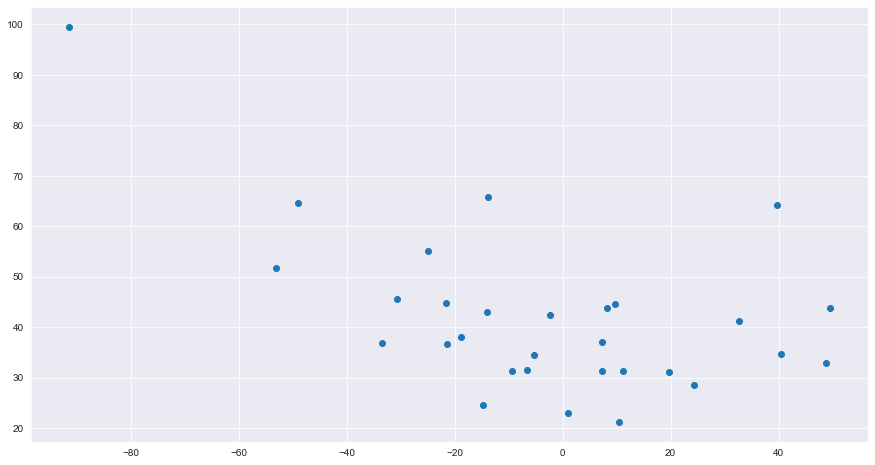

In [248]:
fig,ax = plt.subplots(figsize=(15,8))
graph = ax.scatter(df_new['annual_avg_ret'],df_new['annual_avg_vol'])
graph

In [249]:
# fitting the KMeans model on data for clustering with k = 4 
kmeans = KMeans(n_clusters=4) 
df_new['cluster'] = kmeans.fit_predict(df_new[['annual_avg_ret','annual_avg_vol']])
df_new

,annual_avg_ret,annual_avg_vol,cluster
ASIANPAINT,10.424575,21.181788,0
AXISBANK,24.320907,28.438362,0
ADANIPORTS,7.296896,31.263266,0
GAIL,-5.385491,34.474607,0
HEROMOTOCO,-14.740441,24.543549,0
RELIANCE,9.767984,44.497878,0
TCS,8.282891,43.775436,0
INFY,-2.408823,42.382423,0
MARUTI,1.059423,22.911264,0
TITAN,48.783879,32.901797,3


In [250]:
# finding the centriods
centroid = kmeans.cluster_centers_
centroid

array([[  4.32772472,  32.54522666],
       [-28.07966115,  48.22418801],
       [-91.42526444,  99.55457042],
       [ 42.22728559,  43.37737535]])

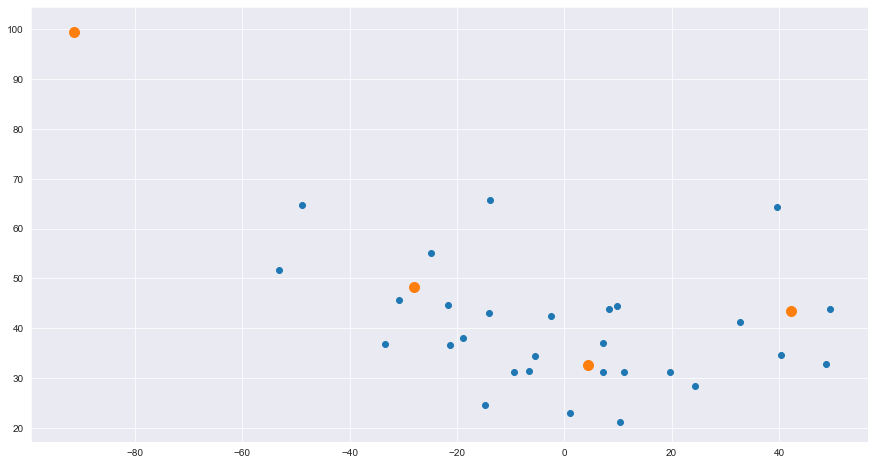

In [252]:
# plotting the centroid and the different stocks on scatter plot
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(df_new['annual_avg_ret'],df_new['annual_avg_vol'])
ax.scatter(centroid[:,0],centroid[:,1], s=100)

In [253]:
# making seperate dataframes for each cluster 
c1 = df_new[df_new.cluster==0]
c2 = df_new[df_new.cluster==1]
c3 = df_new[df_new.cluster==2]
c4 = df_new[df_new.cluster==3]

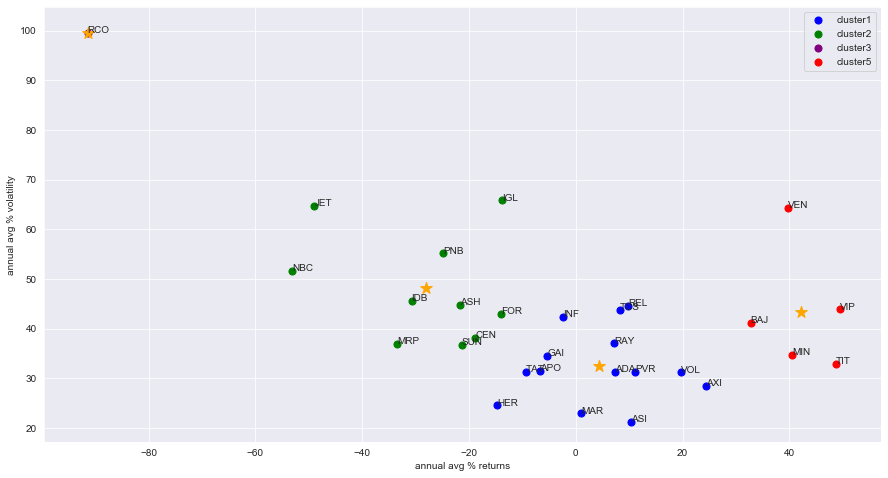

In [267]:
# ploting different cluster with different color
fig,ax = plt.subplots(figsize= (15,8))
ax.scatter(c1['annual_avg_ret'],c1['annual_avg_vol'], color ='blue' ,s =50, label='cluster1')
ax.scatter(c2['annual_avg_ret'],c2['annual_avg_vol'], color ='g' ,s =50, label='cluster2')
ax.scatter(c3['annual_avg_ret'],c3['annual_avg_vol'], color ='purple' ,s =50, label='cluster3')
ax.scatter(c4['annual_avg_ret'],c4['annual_avg_vol'], color ='red' ,s =50, label='cluster5')
# plotiing the centroid with different marker 
ax.scatter(centroid[:,0],centroid[:,1],marker ='*', s=150, color = 'orange')
# setting labels for x and y axis 
plt.xlabel('annual avg % returns')
plt.ylabel('annual avg % volatility')
# setting legend and annotation 
ax.legend()
for i,txt in enumerate(stocks):
    ax.annotate(txt[:3], (df_new['annual_avg_ret'][i],df_new['annual_avg_vol'][i]))


## Optimization in KMeans using Elbow Method-

In [275]:
# creating empty list to add the squared error value
sq_error= []

# itrating the model with different vlaues of k and adding to the list
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_new[['annual_avg_ret','annual_avg_vol']])
    sq_error.append(kmeans.inertia_)
    
sq_error


[35904.46158457792,
 17627.458132440453,
 10081.711962962654,
 5860.09760810377,
 4208.998210353647,
 3360.6428169061332,
 2496.1089343282556,
 1941.3675288652794,
 1528.5171447823764]

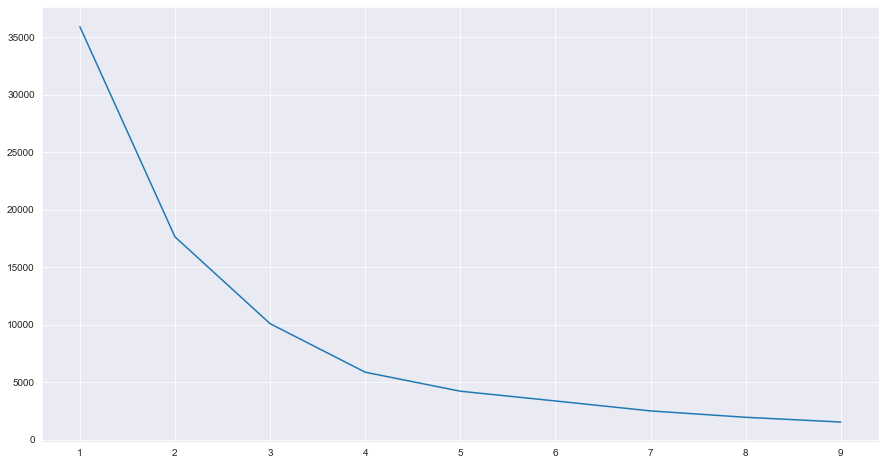

In [283]:
# ploting the Elbow Curve
fig,ax = plt.subplots(figsize= (15,8))
ax.plot(range(1,10),sq_error,)

From the plot, we have elbow =4,which means the optimal n_clusters = 4,which is same as the one we picked.

## 6.4 Prepare a separate Data frame to show which stocks belong to the same cluster¶


In [300]:
clustered_df = df_new
clustered_df

,annual_avg_ret,annual_avg_vol,cluster
ASIANPAINT,10.424575,21.181788,0
AXISBANK,24.320907,28.438362,0
ADANIPORTS,7.296896,31.263266,0
GAIL,-5.385491,34.474607,0
HEROMOTOCO,-14.740441,24.543549,0
RELIANCE,9.767984,44.497878,0
TCS,8.282891,43.775436,0
INFY,-2.408823,42.382423,0
MARUTI,1.059423,22.911264,0
TITAN,48.783879,32.901797,3
